In [1]:
import pandas as pd
import numpy as np
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [3]:
sys.path.append(os.environ['RNETEB_PATH']+ '/tools')
from plotting import plot_logkd_histograms

In [4]:
eb_rs_data = pd.read_json(os.environ['RNETEB_PATH']+'/data/EternaBench_Riboswitch_Filtered_23May2022.json.zip')
eb_rs_data = eb_rs_data.reset_index(drop=True)
# Check the data loaded. 
eb_rs_data.head()

,Activation Ratio,Design,Folding_Subscore,KDFMN,KDOFF,KDON,KDnoFMN,Kd_OFF,Kd_ON,NumberOfClusters,...,lig_aptamer,MS2_lig_aptamer,constraints_worked,logkd_nolig,logkd_lig,logkd_nolig_scaled,logkd_lig_scaled,Dataset,passed_CDHIT_filter,log_AR
0,0.985644,None,NaN,NaN,8.688763,8.815313,NaN,8.688763,8.815313,NaN,...,..........(xxxxx(.................)xxxxxx).......,..........(xxxxx(.................)xxxxxx)...(...,0,2.176490,2.162031,1.075144,1.060684,Ribologic_FMN,True,-0.014460
1,0.638712,None,NaN,NaN,68.275500,106.895529,NaN,68.275500,106.895529,NaN,...,..........(xxxxxx(...............................,..........(xxxxxx(.........................(((...,0,4.671852,4.223551,3.570506,3.122205,Ribologic_FMN,True,-0.448301
2,1.195391,None,NaN,NaN,9.479632,7.930152,NaN,9.479632,7.930152,NaN,...,..........(xxxxxx(.................)xxxxx).......,..........(xxxxxx(.................)xxxxx).......,0,2.070672,2.249146,0.969326,1.147799,Ribologic_FMN,True,0.178473
3,0.827836,None,NaN,NaN,37.213889,44.953230,NaN,37.213889,44.953230,NaN,...,..........(xxxxxx(.................)xxxxx).......,..........(xxxxxx(.................)xxxxx).......,0,3.805623,3.616682,2.704276,2.515336,Ribologic_FMN,True,-0.188941
4,1.002273,None,NaN,NaN,198.475109,198.024952,NaN,198.475109,198.024952,NaN,...,..........(xxxxxx(.................)xxxxx).......,..........(xxxxxx(.................)xxxxx).......,0,5.288393,5.290664,4.187047,4.189317,Ribologic_FMN,True,0.002271


# Now filter out the data from the EB riboswitch metadata file that matches sequences from the EternaFold train and holdout fasta files. 

 1) Filter EternaBench riboswitch metadata file using the same EternaFold training fasta file 

 2) Filter EternaBench riboswtich metadata file using the same EternaFold holdout fasta file for validation.  

In [5]:
train_fasta = os.environ['RNETEB_PATH']+'/data/RiboswitchData_train.fasta'
test_fasta = os.environ['RNETEB_PATH']+'/data/RiboswitchData_holdout.fasta'

In [6]:
# load the fasta file train data using biopython module 
train_data = []
with open(train_fasta, "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        train_data.append({
            "id": record.id,
            "description": record.description,
            "sequence": str(record.seq)
        })

In [7]:
# now load the training data as a dataframe in pandas 
train_df = pd.DataFrame(train_data)
print(train_df.head())

                                 id                       description  \
0  ../RiboswitchData/train/FMN_2201  ../RiboswitchData/train/FMN_2201   
1  ../RiboswitchData/train/FMN_1971  ../RiboswitchData/train/FMN_1971   
2   ../RiboswitchData/train/FMN_559   ../RiboswitchData/train/FMN_559   
3   ../RiboswitchData/train/FMN_936   ../RiboswitchData/train/FMN_936   
4  ../RiboswitchData/train/Trp_2615  ../RiboswitchData/train/Trp_2615   

                                            sequence  
0  CGUUACAUAGAGAAGGUUCAUAAGAUCAAAUAACAUGAGGAUCACC...  
1  AUUUCAUGUGUAGGAUAUCGCAUUCAGAACUAGCCAUCCACAUGAG...  
2  AAUGGACGAGGAUAUACAUGAGGAUCACCCAUGUCACAGUGGGCUC...  
3  GAACUUCGAGUCAGGAUAUGUACAUCAAAACCAAAACAGAAGGGAC...  
4  AGUCCUCUGUACCCUGAUGCCCUCACUUUACGAGGACCGGUACGGC...  


In [8]:
# Merge eb_rs_data and train_df based on identical 'sequence' values (inner merge)
train_merged_df = pd.merge(eb_rs_data, train_df, on='sequence', how='inner')
train_merged_df.to_json(os.environ['RNETEB_PATH']+'/data/RNET_EB_train.json')

In [9]:
# load the fasta file validation data using biopython module 
validation_data = []
with open(test_fasta, "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        validation_data.append({
            "id": record.id,
            "description": record.description,
            "sequence": str(record.seq)
        })

In [10]:
# now load the validation data as a dataframe in pandas 
val_df = pd.DataFrame(validation_data)
print(val_df.head())
len(val_df)

                                   id                         description  \
0   ../RiboswitchData/holdout/FMN_973   ../RiboswitchData/holdout/FMN_973   
1  ../RiboswitchData/holdout/Trp_2650  ../RiboswitchData/holdout/Trp_2650   
2  ../RiboswitchData/holdout/FMN_1403  ../RiboswitchData/holdout/FMN_1403   
3   ../RiboswitchData/holdout/FMN_745   ../RiboswitchData/holdout/FMN_745   
4   ../RiboswitchData/holdout/FMN_394   ../RiboswitchData/holdout/FMN_394   

                                            sequence  
0  GUUGGAUUUGUGAGGAUAUGGCCGUGACAUUUGGACCAGAAGGCAC...  
1  UUCACGGGCACGGCCGCCACUAACCAACAUGAGGAUCACCCAUGUG...  
2  UGCCUAUACCAGAAGGGCGUACGGGAAAACAUGAGGAUCACCCAUG...  
3  UUUAAGAGAGGAUAUGUAGAAUAUAACAUGAGGAUCACCCAUGUAC...  
4  UAAGCGUUAGGAUAUACAAAACGAAGAAAGUGAUUCAGAAUACAUG...  


646

In [11]:
# Merge all_rs_data and val_df based on identical 'sequence' values (inner merge)
val_merged_df = pd.merge(eb_rs_data, val_df, on='sequence', how='inner')
val_merged_df.to_json(os.environ['RNETEB_PATH']+'/data/RNET_EB_val.json')

In [12]:
len(val_merged_df)

629

## Now I want test data to be any sequence that is NOT in the training and validation set. 



In [13]:
# concat the train and val dfs 
combined_train_val_df = pd.concat([train_merged_df, val_merged_df])

print(len(combined_train_val_df))

1887


In [14]:
# Filter eb_rs_data to exclude rows where 'sequence' is in combined_train_val_df['sequence']
filtered_test_df = eb_rs_data[~eb_rs_data['sequence'].isin(combined_train_val_df['sequence'])]
# Need to drop index of the filtered test data for testing loop to work. 
filtered_test_df = filtered_test_df.reset_index()
len(filtered_test_df)

filtered_test_df.to_json(os.environ['RNETEB_PATH']+'/data/RNET_EB_test.json')

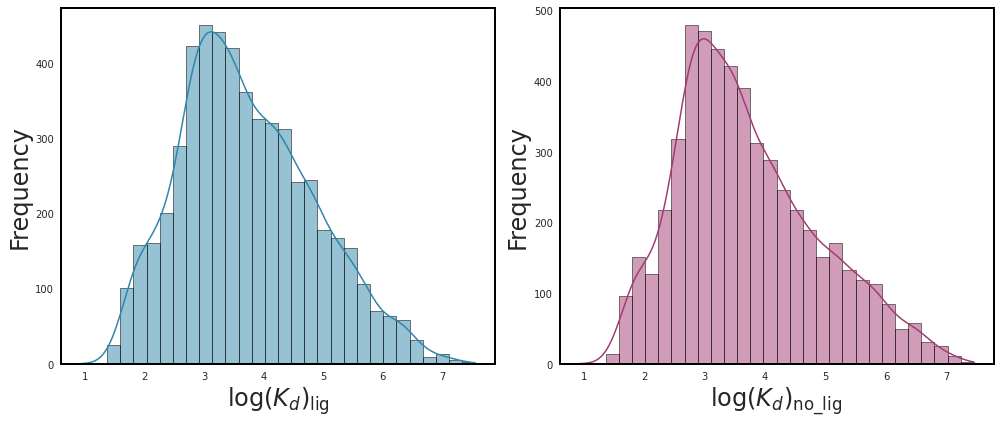

In [15]:
# TEST DATA Histograms 

# If you want to save the figure
fig, axes = plot_logkd_histograms(filtered_test_df)
plt.savefig(os.environ['RNETEB_PATH']+'/figures/logkd_histograms_test.png', dpi=300, bbox_inches='tight')
plt.savefig(os.environ['RNETEB_PATH']+'/figures/logkd_histograms_test.svg', format='svg', bbox_inches='tight')
plt.show()


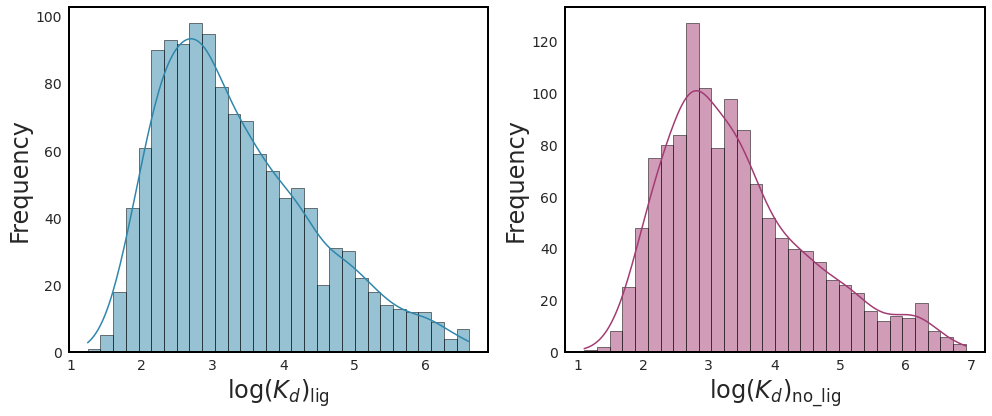

In [16]:
# TRAIN DATA Histograms 

# If you want to save the figure
fig, axes = plot_logkd_histograms(train_merged_df)
plt.savefig(os.environ['RNETEB_PATH']+'/figures/logkd_histograms_train.png', dpi=300, bbox_inches='tight')
plt.savefig(os.environ['RNETEB_PATH']+'/figures/logkd_histograms_train.svg', format='svg', bbox_inches='tight')
plt.show()